# Overview
In this project, I will be using data from OKCupid, a dating application that aims to match prospective lovers together using short answers based off their profiles. The data was to provided to me by Codecademy as part of their course on learning data science. 

My goal for this project is to scope, prepare, analyze and evaluate the data using a Machine Learning model to evaluate the question. 

***Can a user's generation be predicted using other variables on their profiles?***

## Scoping 
### Project goals 
The goal is to use a supervised machine learning to accurately predict the generation of a user based on a number of feature variables. I aim to do this to see what features are more common amongst certain user profiles. This is important in the context of dating apps because often disparities within generations manifest in areas such as children, pets and even religion. Since it's generally believed older people are more likely to have children, have pets and be more religious. Why does age matter in the context of dating apps? Because on dating apps, age is one of the factors most likely to affect two people's compatibility in a society increasingly divided along generational lines. 

### Data
The data used will be provided by Codecademy and imported as a CSV file. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

### Analysis

The solution will use descriptive analysis as well as visualizations to understand better the count, distribution and relationship between variables. Since the features variables will use labelled data to categorize the data, a supervised machine learning classification model will be used. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 





In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Load the data in
profiles = pd.read_csv('profiles.csv', encoding='utf-8')

In [4]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Demographics and EDA

There are 59946 people in the dataset 35,829 males in the dataset and 24,117 females. 73% of respondents drink socially making up the overwhelming majority of the those surveyed. Roughly 10% drink rarely and another 10% drink often. Surpisingly therefore, a similar proportion of those who drink rarely drink often. 5 percent of those surveyed don't drink at all. Of all the people in the dataset, only 92% are single, with 3% seeing someone and 0.05% married (that's 310 people, by the way)

With regard to the average user, they are a 32 year old and male. 

In [5]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [6]:
len(profiles)

59946

In [7]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [8]:
drinking = profiles.drinks.value_counts(normalize=True)
drinking

socially       0.733484
rarely         0.104580
often          0.090659
not at all     0.057355
very often     0.008269
desperately    0.005653
Name: drinks, dtype: float64

In [9]:
profiles.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [10]:
profiles.offspring.value_counts(normalize=True)

doesn&rsquo;t have kids                                0.310027
doesn&rsquo;t have kids, but might want them           0.158909
doesn&rsquo;t have kids, but wants them                0.146196
doesn&rsquo;t want kids                                0.120033
has kids                                               0.077220
has a kid                                              0.077138
doesn&rsquo;t have kids, and doesn&rsquo;t want any    0.046422
has kids, but doesn&rsquo;t want more                  0.018126
has a kid, but doesn&rsquo;t want more                 0.011277
has a kid, and might want more                         0.009473
wants kids                                             0.009227
might want kids                                        0.007464
has kids, and might want more                          0.004716
has a kid, and wants more                              0.002912
has kids, and wants more                               0.000861
Name: offspring, dtype: float64

In [11]:
np.mean(profiles.age)

32.3402895939679

In [12]:
profiles.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [13]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

# Age 
Since we are looking at the generation the user belongs to, age will be one of the most important variables. Shortly, I'll use it to create another column known as generation. Firstly let's look the distribution.

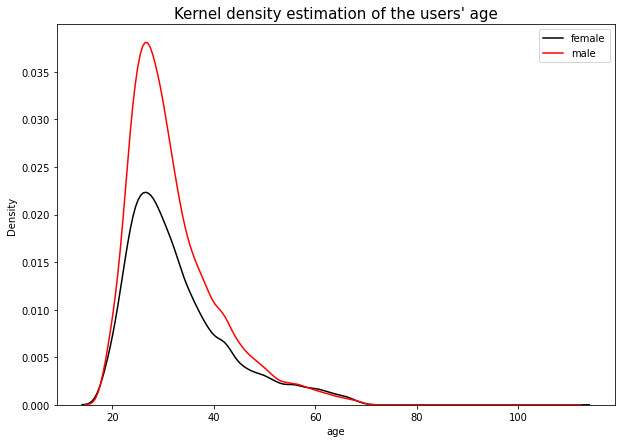

In [97]:
plt.figure(figsize=(10, 7))
plt.title('Kernel density estimation of the users\' age', size=15)
sns.kdeplot(x = 'age', data=profiles, hue='sex', palette=['red', 'black']);
plt.legend(['female', 'male']);

The KDE is skewed to the right and is unimodal. From first glance we can see that men make up slightly more than women. the most common age range is between 20 and 40 for both genders, with roughly the same amount of men and women between 55 and 70. We now need to create a new column, generation that will be our labelled data. Given this data is from approximately June 2012, that makes it almost 10 years old! By data standards, that is really old! Since context is critical in generational classifying, I will ensure they are categorized by their generation at the time of the survey (2012) and not by this year (2021). 

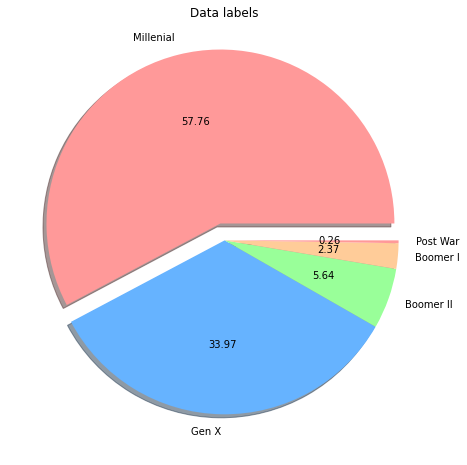

In [98]:
def generation_classify(age):
    birth_year = 2012 - age
    if birth_year >= 1928 and birth_year <= 1945:
        return 'Post War'
    elif birth_year >= 1946 and birth_year <= 1954:
        return 'Boomer I'
    elif birth_year >= 1955 and birth_year <= 1964:
        return 'Boomer II'
    elif birth_year >= 1965 and birth_year <= 1980:
        return 'Gen X'
    elif birth_year >= 1981 and birth_year <= 1996:
        return 'Millennial'
profiles['generation'] = profiles.age.apply(generation_classify)
fig1, ax1 = plt.subplots(figsize=(8, 8))
profiles['generation'].value_counts(normalize=True)
labels = ['Millenial', 'Gen X', 'Boomer II', 'Boomer I', 'Post War']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0, 0)
ax1.pie(profiles['generation'].value_counts(normalize=True), labels=labels, autopct='%.2f', explode=explode, colors=colors, shadow =True);
plt.title('Data labels');



From the pie chart we can see 57.76% of respondents are Millennials and 33.97% are Gen X. The older a respondent is, the less likely they are to be in the dataset. For instance, Post War respondents make up only 0.26% of the dataset, although that is 156 people. Since I'll be opting for multiclass classification, the distribution of labels is inbalanced and therefore may result in a unfair or bias model. I'll look to rectify this problem later on. 

In [99]:
profiles.generation.value_counts()

Millennial    34625
Gen X         20360
Boomer II      3382
Boomer I       1421
Post War        156
Name: generation, dtype: int64

# Height 
Next I'll look at height, as it seems that most people are between 5 foot 5 and 6 foot 7. On the x-axis these are shown in inches (60 - 80). The graph below reflects that there are a larger number of males in the group than females.

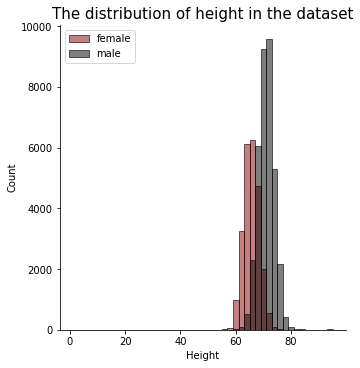

In [125]:
sns.displot(x = 'height', data=profiles, kind='hist',  binwidth=2, color='darkred', hue='sex', palette=['black', 'darkred'], legend=None);
plt.title('The distribution of height in the dataset', size=15);
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend(['female', 'male'])

# Body type
One of the most important variables used to predict a user's generation is their body type. From the count plot below, we can see that most of the users are average, fit or athletic. The three categories make up the overwhelming majority of those surveyed. According to the survey, men are more than twice as likely to describe their body type as athletic or fit. Whilst women are more far more likely to describe themselves as curvey. 
Men are much more likely to describe themselves as a little extra than curvey. 

In [126]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(y = 'body_type',data=profiles, order=profiles.body_type.value_counts().index, hue='sex', palette=['black', 'darkred']);
plt.title('The body type of the dataset', size=15);
plt.clf()

<Figure size 864x576 with 0 Axes>

# Diet 
The diet chart below tells us that 'mostly anything' is the most common dietary requirement. 

Text(0.5, 0, 'Count')

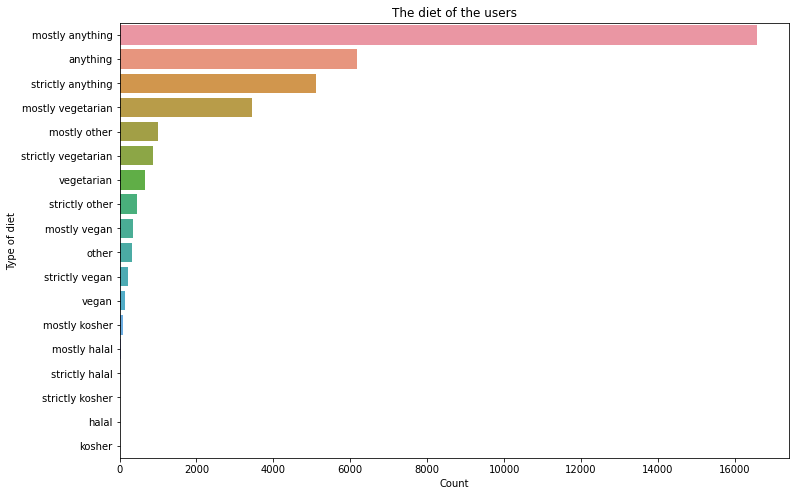

In [127]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(y = 'diet', data=profiles, order=profiles.diet.value_counts().index);
plt.title('The diet of the users')
plt.ylabel('Type of diet')
plt.xlabel('Count')


# Drinking, drugs and smoking
Most people overwhelmingly drink socially and never take drugs. These features will still be used as a feature variable in my model as they could still prove useful in determining a user's age. I believe it is more likely a person drinks and smokes if they are older. Although later on we will see how useful this variable can be. 

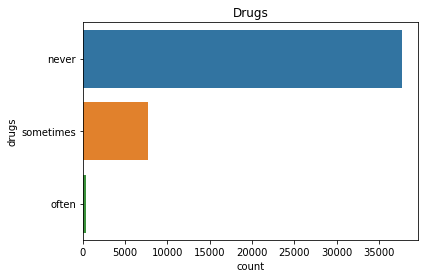

In [128]:
sns.countplot(y = 'drugs', data=profiles)
plt.title('Drugs');

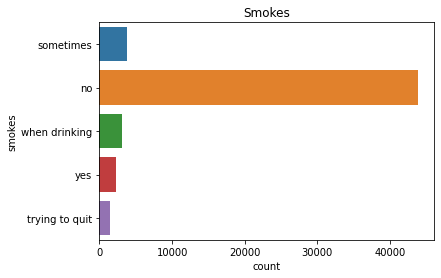

In [129]:
sns.countplot(y = 'smokes', data=profiles)
plt.title('Smokes');

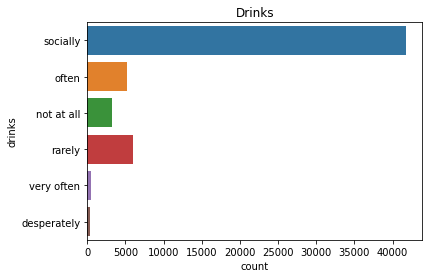

In [130]:
sns.countplot(y = 'drinks', data=profiles)
plt.title('Drinks');

# Religion

Religion has a lot of qualifiers and therefore I will aim to distil down to 9 groups. 

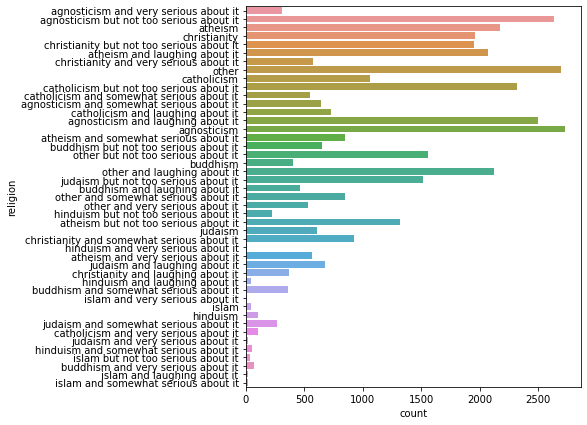

In [131]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

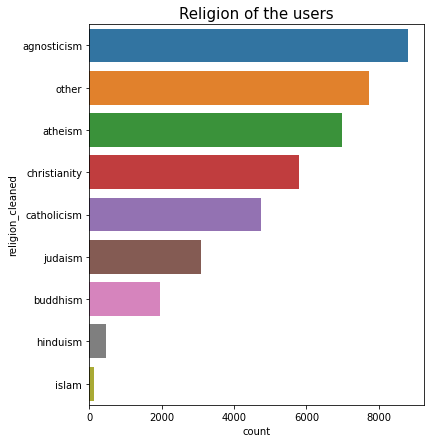

In [132]:
plt.figure(figsize=(6, 7))
plt.title('Religion of the users', size=15)
plt.ylabel('Type of religion')
profiles['religion_cleaned'] = profiles['religion'].str.split().str.get(0)
sns.countplot(y = 'religion_cleaned', data=profiles, order=profiles.religion_cleaned.value_counts().index);

The chart tells us that most of the respondents are agnostic and then other, then atheist, followed by christian

# Status and job 
According to the data, most users are single, which is hopefully what you would expect for an online dating website! Furthermore, most jobs were defined as other, with students being the second largest groups, followed by tech and then computers. Not particularly suprising since the users are from San Francisco, California. 

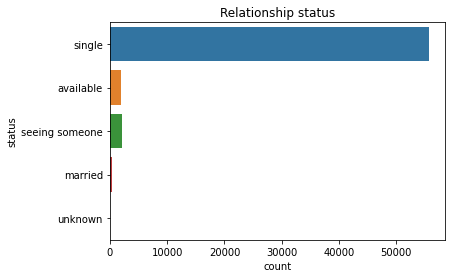

In [133]:
sns.countplot(y = 'status', data=profiles);
plt.title('Relationship status');


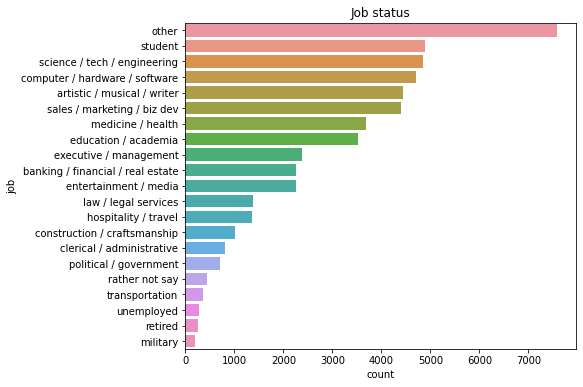

In [134]:
plt.figure(figsize=(7, 6))
sns.countplot(y = 'job', data=profiles, order=profiles.job.value_counts().index);
plt.title('Job status');

# Pets
The graph belows tells us that most people like dogs and cats. Phew! With virtually no one in the dataset disliking just dogs. Who can blame them?

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'generation',
       'religion_cleaned'],
      dtype='object')

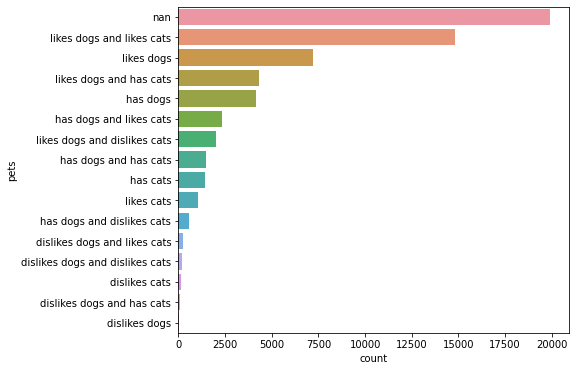

In [135]:

plt.figure(figsize=(7, 6))
sns.countplot(y = 'pets', data=profiles, order=profiles.pets.value_counts().index);
profiles['pets'] = profiles.pets.astype('str')
profiles.columns

In [136]:
profiles.pets.value_counts()

nan                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

# Preprocessing the data
At a glance, it would appear that many of the columns have missing data. This can make my model much less accurate and so I'll remove all Nan types from the feature variables. 

In [137]:
profiles.isna().sum()

cols = ['body_type', 'diet', 'drinks', 'drugs', 'smokes', 'pets', 'status', 'job', 'generation', 'religion_cleaned']
profiles.shape
df = profiles[cols].dropna()
df.shape
df.head()
df['millennial'] = df.generation.apply(lambda x:1 if x == 'Millennial' else 0)


In [138]:
df.drop('generation', inplace=True, axis=1)
df.head()

,body_type,diet,drinks,drugs,smokes,pets,status,job,religion_cleaned,millennial
0,a little extra,strictly anything,socially,never,sometimes,likes dogs and likes cats,single,transportation,agnosticism,1
1,average,mostly other,often,sometimes,no,likes dogs and likes cats,single,hospitality / travel,agnosticism,0
7,average,mostly anything,socially,never,no,likes dogs and likes cats,single,artistic / musical / writer,christianity,1
9,athletic,mostly anything,not at all,never,no,likes dogs and likes cats,single,student,atheism,0
11,average,mostly anything,socially,never,no,likes cats,seeing someone,banking / financial / real estate,christianity,1


In [139]:

cols = ['body_type', 'diet', 'drinks', 'drugs', 'smokes', 'pets', 'status', 'job', 'religion_cleaned', 'millennial']

for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [140]:
df.head()

,millennial,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_unemployed,religion_cleaned_agnosticism,religion_cleaned_atheism,religion_cleaned_buddhism,religion_cleaned_catholicism,religion_cleaned_christianity,religion_cleaned_hinduism,religion_cleaned_islam,religion_cleaned_judaism,religion_cleaned_other
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Inbalanced data for multiclass classification
Returning to the previous point about the class labels, I pointed out that millenial volume is by far the largest group in the dataset, making up 57% of the dataset with 5 labels. As such, this is a highly inbalanced dataset and so the accuracy of the dataset is likely to be biased, since models perform best when there is an even distribution of classes in the training set. One way to correct an inbalance is to collect more data, however collecting data on dating profiles is hard due to privacy concerns. To combat this I am therefore going to reframe the data question into a binary classification. Instead the focus on the model will be determining it can predict whether a user is a millennial or not. Thus, the millennials will make up 57% of the data and non millennials will make up 43% of the data, which is acceptable.

In [141]:
df.millennial.value_counts()



1    10146
0     7737
Name: millennial, dtype: int64

In [142]:
df.head()

,millennial,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_unemployed,religion_cleaned_agnosticism,religion_cleaned_atheism,religion_cleaned_buddhism,religion_cleaned_catholicism,religion_cleaned_christianity,religion_cleaned_hinduism,religion_cleaned_islam,religion_cleaned_judaism,religion_cleaned_other
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Split the data

In [145]:
col_length = len(df.columns)

#Y is the target column, X has the features
X = df.iloc[:, 1:col_length-1]
y = df.iloc[:, 0:1]

# Establish the test size
val_size = 0.25


# Split the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=42)

# turn to 1d numpy arrays

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


,millennial
0,1
1,0
7,1
9,0
11,1
...,...
59931,1
59936,1
59942,1
59943,0


# Logistic Regression
The first model I'll use is Logistic regression setting  `multi_class = 'ovr'` 

In [147]:
# import the library 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR = LogisticRegression(solver='lbfgs')
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


lr_predictions = logreg.predict(X_test)

print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1956
           1       0.69      0.73      0.71      2515

    accuracy                           0.66      4471
   macro avg       0.65      0.65      0.65      4471
weighted avg       0.66      0.66      0.66      4471



The model has a 66% prediction accuracy. Hopefully this can be improved. I'll now try a K-Neigherst neighbors classifier. 

# K-Nearest Neighbors
I'll impliment k-nearest neighbors with the default k value of 5. Afterwards, I'll explore some different values for K to find the highest precision model

In [158]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)
knn_predictions = classifier.predict(X_test)

print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1956
           1       0.67      0.70      0.68      2515

    accuracy                           0.64      4471
   macro avg       0.63      0.63      0.63      4471
weighted avg       0.63      0.64      0.63      4471



This model has an accuracy of 64% which has room for improvement, now let's see if I can improve that with different k inputs.

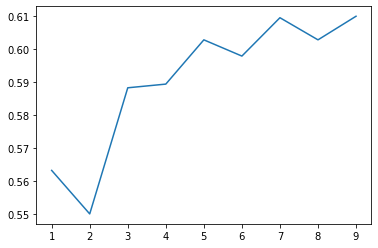

In [159]:
scores = []
for k in range(1, 10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    
plt.plot(range(1, 10), scores)
plt.show()

# Decision tree classification

In [39]:
# Import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
# Import accuracy score 
from sklearn.metrics import accuracy_score

In [160]:
dt = DecisionTreeClassifier(random_state=1)

In [166]:
dt.fit(X_train, y_train)
cart_predictions = dt.predict(X_train)

In [167]:
print(classification_report(y_train, cart_predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5781
           1       0.97      0.93      0.95      7631

    accuracy                           0.94     13412
   macro avg       0.94      0.94      0.94     13412
weighted avg       0.94      0.94      0.94     13412



The Decision tree classification model is a lot more promising as it has an accuracy of 94%
I'll now visualise the results with a confusion matrix to see the performance in closer detail

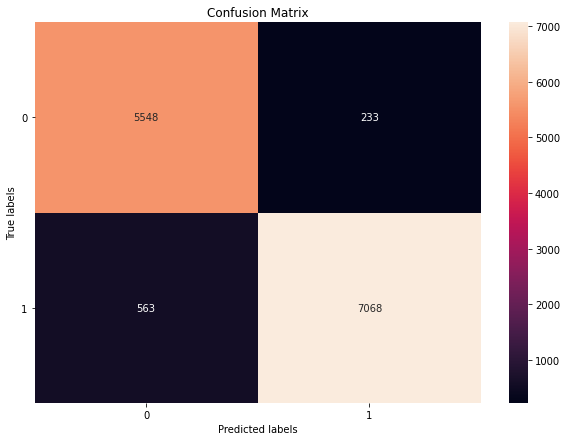

In [174]:
from sklearn.metrics import confusion_matrix

cart_matrix = confusion_matrix(y_train, cart_predictions)
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_matrix, annot=True, ax = ax,fmt="d");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)

The model performed quite well, especially when predicting true positives. False negatives, where the model predicted that it was not a millenial when in fact it was, seem to be the highest at 563. This could be slightly higher than false negatives (233) because there are more millenials in the dataset than non-millennials and therefore the model overfit the training data.


# Conclusion 

* The best model for predicting in binary classification is the Decision Tree classifier, with an accuracy of 94%.
* The data is slightly inbalanced with more millennials than non-millennials.
* The most likely profile in the dataset is a millennial man with no children, drinks, doesn't smokes, doesn't have kids, likes cats and dogs, isn't religious and eats mostly anything. In other words, me. 
